<a href="https://colab.research.google.com/github/andrii4k-kit/pytorch-learning/blob/main/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch Workflow

In [378]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

### Data preparing

In [379]:
# Create known paramters
weight = 0.7
bias = 0.3

#
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [380]:
len(X), len(y)

(50, 50)

### Spliting data into training and test sets

In [381]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [382]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [383]:
# visualising data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predcitions?

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})





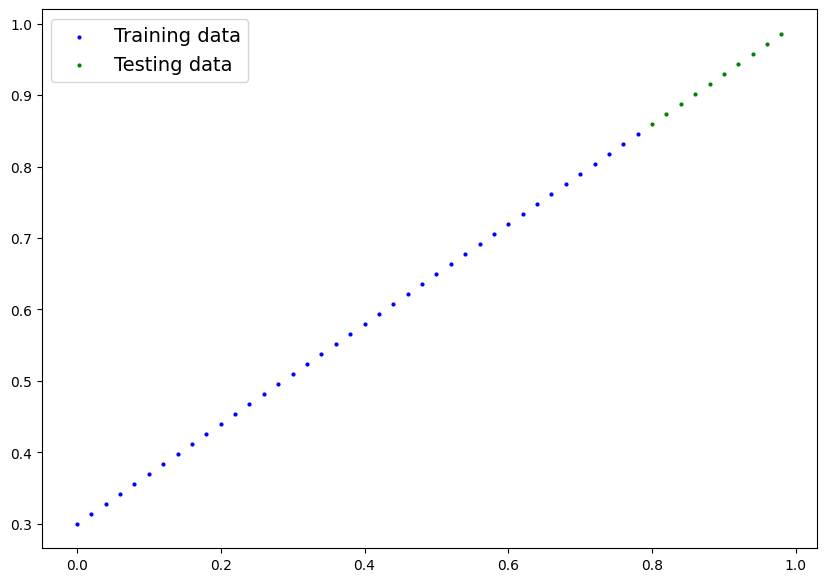

In [384]:
plot_predictions()

### 2. Building a Model

In [385]:
from torch import nn
import torch
# linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input
    return self.weights * x + self.bias


### Checking the contents of PyTorch model

In [386]:
# Random Seed
torch.manual_seed(42)

# create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [387]:
# Lsit named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction with `torch.inference_mode()`

In [388]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [389]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [390]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

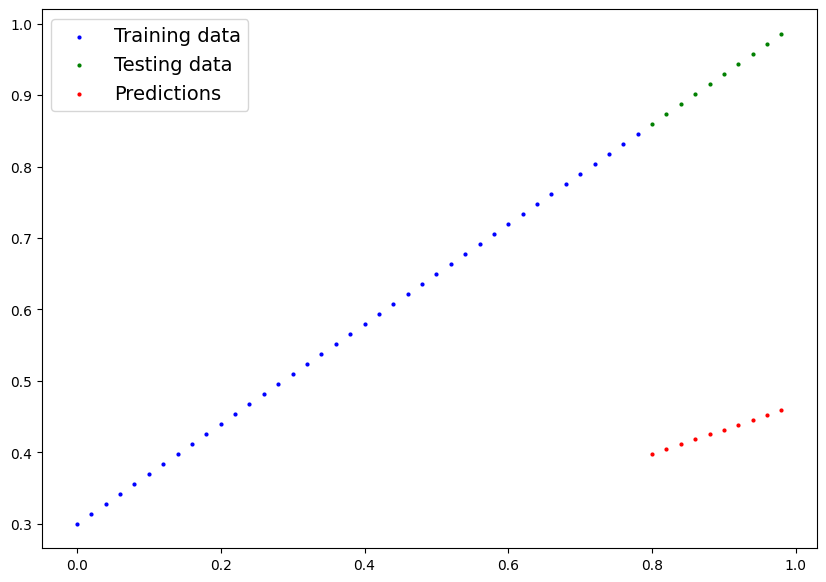

In [391]:
plot_predictions(predictions=y_preds)

### 3. Train Model


* **Loss fucntion** may aslo be called cost function or criterion in different areas
* Loss function measures how wrong model's predcitions are


In [392]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [393]:
model_0.state_dict( )

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [394]:
# Setup a loss fucntion
loss_fn = nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate


### Building a training loop in PyTorch


In [395]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


### Training

  # 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()


  ### Testing
  model_0.eval() # turns off gradient tracking
  with torch.inference_mode(): # turns of gradient tracking & a couple more things
    # that not needed here
    # 1. Do the forward pass
    test_pred = model_0(X_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

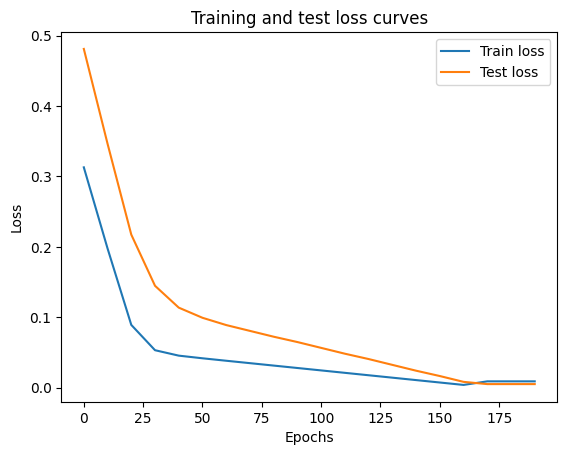

In [396]:
import numpy as np


# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [397]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [398]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

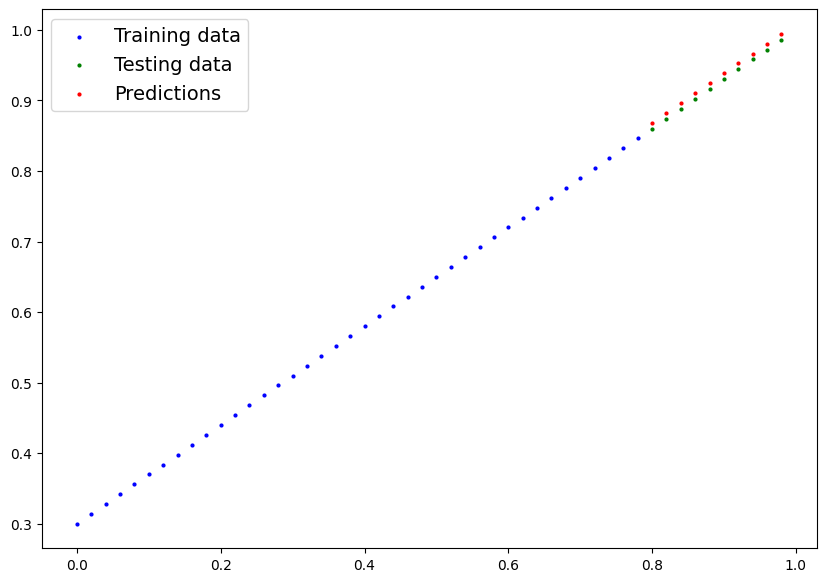

In [399]:
plot_predictions(predictions=y_preds_new)

In [400]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

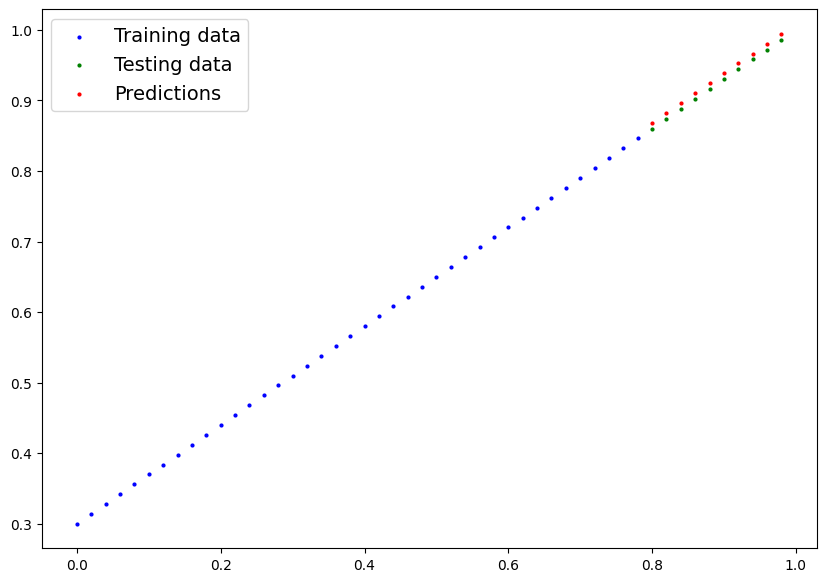

In [401]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch

1. `torch.save()`
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`




In [402]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to: models/01_pytorch_workflow_model.pth


In [403]:
!ls -1 models

01_pytorch_workflow_model_1.pth
01_pytorch_workflow_model.pth


### Loading a PyTorch model


In [404]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [405]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [406]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [407]:
# Make some predicitons with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [408]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

### 6. Putting it all together

In [409]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Create a linear regression a PyTorch linear model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    # self.weights = nn.Parameter(torch.randn(1,
    #                                         requires_grad=True,
    #                                         dtype=torch.float))
    # self.bias = nn.Parameter(torch.randn(1,
    #                                         requires_grad=True,
    #                                         dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


Using device: cpu


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [410]:
# Data preparation
# Known parameters
weight = 0.8
bias = 1

start = 0
end = 3
step = 0.12

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.1200],
         [0.2400],
         [0.3600],
         [0.4800],
         [0.6000],
         [0.7200],
         [0.8400],
         [0.9600],
         [1.0800]]),
 tensor([[1.0000],
         [1.0960],
         [1.1920],
         [1.2880],
         [1.3840],
         [1.4800],
         [1.5760],
         [1.6720],
         [1.7680],
         [1.8640]]))

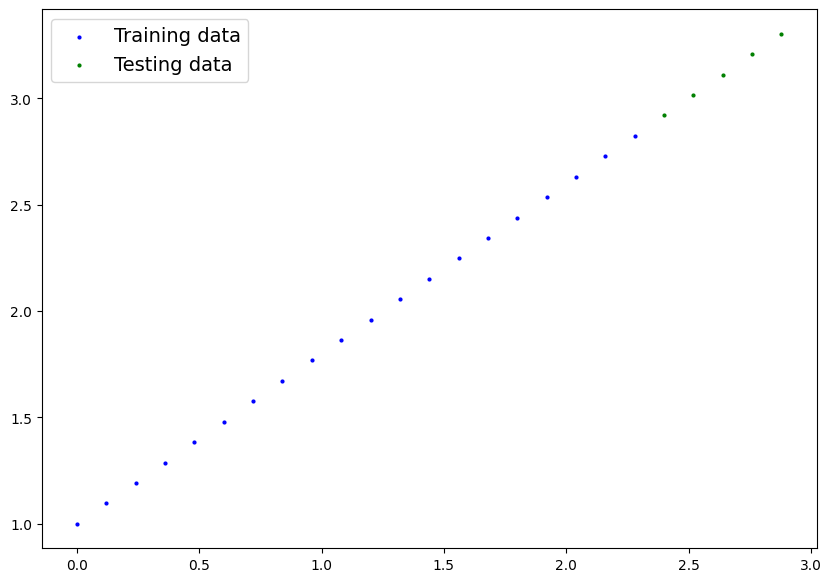

In [411]:
# Split data

train_split = int (0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


# Plot the data

plot_predictions(X_train, y_train, X_test, y_test)

### Training

In [412]:
# Setup loss fucntion
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.01)

In [413]:
# Training loop

torch.manual_seed(42)

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 100

for epoch in range(epochs):

  # Start training mode
  model_1.train()

  # Pass the values
  y_pred = model_1(X_train)

  # Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # Reset the gradient to zero
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if(epoch % 10 == 0):
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.21041814982891083 | Test loss: 0.22351446747779846
Epoch: 10 | Loss: 0.03565007448196411 | Test loss: 0.05865321308374405
Epoch: 20 | Loss: 0.022488320246338844 | Test loss: 0.034796617925167084
Epoch: 30 | Loss: 0.009456196799874306 | Test loss: 0.01700916327536106
Epoch: 40 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404
Epoch: 50 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404
Epoch: 60 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404
Epoch: 70 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404
Epoch: 80 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404
Epoch: 90 | Loss: 0.0074634491465985775 | Test loss: 0.035959385335445404


In [414]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8022]])),
             ('linear_layer.bias', tensor([0.9900]))])

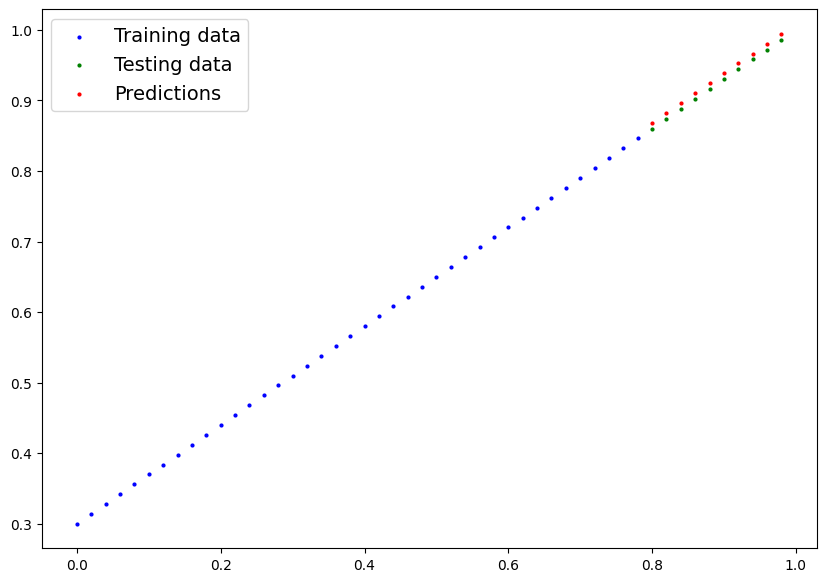

In [415]:
plot_predictions(predictions=y_preds)

### Saving and Loading a trained model


In [416]:
from pathlib import Path

# 1. Models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [417]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [418]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [419]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [420]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [421]:
# Split the data into training and testing
split_amount = int(0.8 * len(X))
X_test, y_test = X[split_amount:], y[split_amount:]
X_train, y_train = X[:split_amount], y[:split_amount]

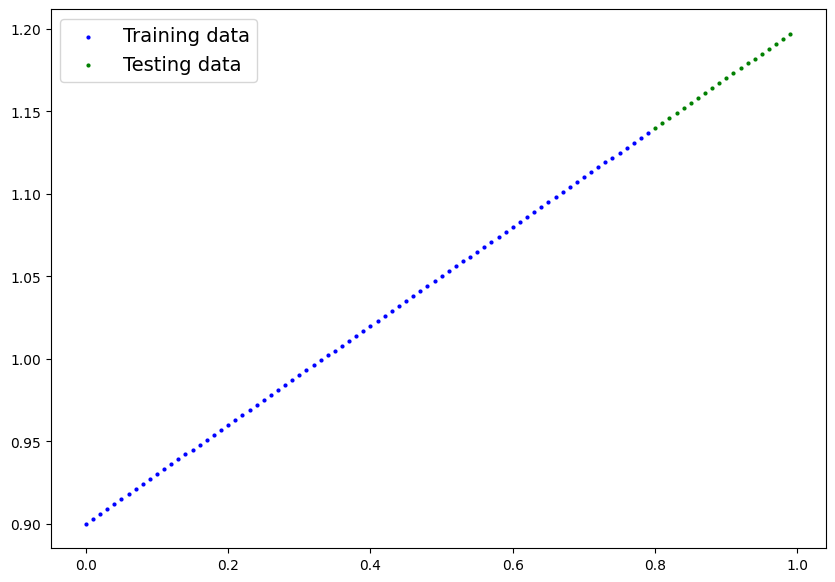

In [422]:
# Plot the training and testing data
def plot_pred(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              predictions = None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

plot_pred(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test)

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [423]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [424]:
# Instantiate the model and put it to the target device
model_ex = LinearRegressionModelV3()
model_ex.to(device)

model_ex, model_ex.state_dict()

(LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2343]])),
              ('linear_layer.bias', tensor([0.9186]))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [425]:
# Create the loss function and optimizer
lf = nn.L1Loss()

optimizer = torch.optim.SGD(model_ex.parameters(), lr=0.01)

In [426]:
# Training loop

torch.manual_seed(42)


# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train, y_train = X_train.to(device).float(), y_train.to(device).float()
X_test, y_test = X_test.to(device).float(), y_test.to(device).float()


for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_ex.train()

  # 1. Forward pass
  y_pred = model_ex(X_train)

  # 2. Calculate loss
  loss = lf(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Testing

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_ex.eval()
      # 1. Forward pass
    with torch.inference_mode():
      test_pred = model_ex(X_test)
      # 2. Calculate test loss
      test_loss = lf(test_pred, y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.193 | Test loss: 0.447
Epoch: 20 | Train loss: 0.100 | Test loss: 0.277
Epoch: 40 | Train loss: 0.083 | Test loss: 0.210
Epoch: 60 | Train loss: 0.075 | Test loss: 0.180
Epoch: 80 | Train loss: 0.068 | Test loss: 0.161
Epoch: 100 | Train loss: 0.061 | Test loss: 0.144
Epoch: 120 | Train loss: 0.055 | Test loss: 0.128
Epoch: 140 | Train loss: 0.048 | Test loss: 0.112
Epoch: 160 | Train loss: 0.041 | Test loss: 0.096
Epoch: 180 | Train loss: 0.034 | Test loss: 0.080
Epoch: 200 | Train loss: 0.027 | Test loss: 0.063
Epoch: 220 | Train loss: 0.020 | Test loss: 0.047
Epoch: 240 | Train loss: 0.014 | Test loss: 0.031
Epoch: 260 | Train loss: 0.007 | Test loss: 0.015
Epoch: 280 | Train loss: 0.003 | Test loss: 0.007


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [427]:
# Make predictions with the model
with torch.inference_mode():
  y_preds = model_ex(X_test)
y_preds

tensor([[1.1337],
        [1.1367],
        [1.1396],
        [1.1425],
        [1.1454],
        [1.1484],
        [1.1513],
        [1.1542],
        [1.1571],
        [1.1601],
        [1.1630],
        [1.1659],
        [1.1688],
        [1.1718],
        [1.1747],
        [1.1776],
        [1.1805],
        [1.1835],
        [1.1864],
        [1.1893]])

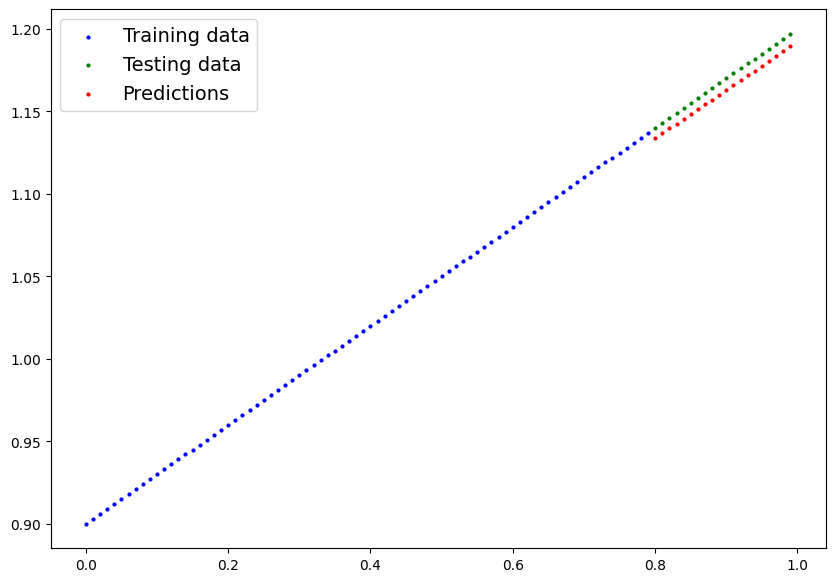

In [428]:
# Plot the predictions (these may need to be on a specific device)
plot_pred(predictions=y_preds)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [429]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("Uebung_Model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_uebung_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
torch.save(obj=model_ex.state_dict(),
           f=MODEL_SAVE_PATH)

In [430]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
model_ex_1 = LinearRegressionModelV3()

model_ex_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH)), model_ex_1.to(device)

(<All keys matched successfully>,
 LinearRegressionModelV3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

In [431]:
# Make predictions with loaded model and compare them to the previous
y_preds_1 = model_ex_1(X_test)
y_preds_1 == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])